# Tarea - Ajuste de curvas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [3]:
import numpy as np
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

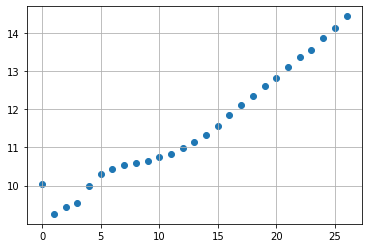

In [4]:
m = len(data)
x = np.linspace(0,26, m)
plt.figure()
plt.scatter(x, data)
plt.grid()

In [5]:
def Fcosto(beta, X, y, s):
    beta = np.reshape(beta, [s,-1])
    pred = X @ beta
    costo = (y-pred).T @ (y-pred)
    return costo [0][0]

# Grados x columna 1
ones = np.ones([m,1])
x1 = np.reshape(x,[m,-1])
x2 = np.reshape(x**2,[m,-1])
x3 = np.reshape(x**3,[m,-1])

# matrices de variables x

MatX1 = np.hstack((ones,x1))
MatX2 = np.hstack((ones,x1,x2))
MatX3 = np.hstack((ones,x1,x2,x3))

# BETA 
beta1 = np.random.rand(2)
beta2 = np.random.rand(3)
beta3 = np.random.rand(4)

y = np.reshape(data,[len(data),-1])
y

array([[10.051101],
       [ 9.259127],
       [ 9.444813],
       [ 9.557723],
       [ 9.977324],
       [10.298326],
       [10.447217],
       [10.550506],
       [10.590784],
       [10.657418],
       [10.743085],
       [10.831965],
       [10.988435],
       [11.153055],
       [11.313326],
       [11.557165],
       [11.860136],
       [12.122511],
       [12.356448],
       [12.611391],
       [12.814569],
       [13.111372],
       [13.357134],
       [13.559012],
       [13.85861 ],
       [14.135924],
       [14.436149]])

In [6]:
print("Grado 1:",Fcosto(beta1,MatX1,y,2))
print("Grado 2:",Fcosto(beta2,MatX2,y,3))
print("Grado 3:",Fcosto(beta3,MatX3,y,4))

Grado 1: 2632.779221891108
Grado 2: 88574.49321925695
Grado 3: 625645594.2865179


In [7]:
import scipy.optimize as opt

sol1 = opt.minimize(Fcosto,beta1,args=(MatX1,y,2))
sol2 = opt.minimize(Fcosto,beta2,args=(MatX2,y,3))
sol3 = opt.minimize(Fcosto,beta3,args=(MatX3,y,4))
sol1

      fun: 2.3704889518153527
 hess_inv: array([[ 0.07010639, -0.00396824],
       [-0.00396824,  0.00030525]])
      jac: array([-2.98023224e-08,  2.98023224e-08])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([9.11567633, 0.18667056])

In [8]:
sol2

      fun: 0.8443845174305169
 hess_inv: array([[ 1.44111097e-01, -2.17399145e-02,  6.83648047e-04],
       [-2.17399145e-02,  4.57200022e-03, -1.64124034e-04],
       [ 6.83648047e-04, -1.64124034e-04,  6.31303454e-06]])
      jac: array([0.00019686, 0.00062652, 0.0114895 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 179
      nit: 4
     njev: 42
   status: 2
  success: False
        x: array([9.59130907e+00, 7.25208238e-02, 4.39035159e-03])

In [9]:
sol3

      fun: 0.8404346758260841
 hess_inv: array([[ 2.27240051e-01, -4.86033109e+00,  4.54480101e-01,
        -1.09795455e-02],
       [-4.86033109e+00,  1.03956489e+02, -9.72066216e+00,
         2.34834457e-01],
       [ 4.54480101e-01, -9.72066216e+00,  9.08960200e-01,
        -2.19590909e-02],
       [-1.09795455e-02,  2.34834457e-01, -2.19590909e-02,
         5.30501767e-04]])
      jac: array([ 1.49011612e-08, -7.45058060e-08, -2.40653753e-06, -5.31449914e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 332
      nit: 10
     njev: 64
   status: 2
  success: False
        x: array([9.56752299e+00, 8.46495837e-02, 3.20207438e-03, 3.04659701e-05])

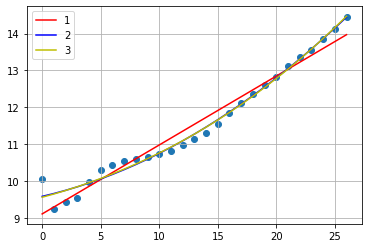

In [10]:
y1 = sol1.x[0] + sol1.x[1]*x
y2 = sol2.x[0] + sol2.x[1]*x + sol2.x[2]*x**2
y3 = sol3.x[0] + sol3.x[1]*x + sol3.x[2]*x**2 + sol3.x[3]*x**3

plt.figure()
plt.scatter(x,data)
plt.plot(x,y1,"r", label = "1")
plt.plot(x,y2,"b", label = "2")
plt.plot(x,y3,"y", label = "3")
plt.legend()
plt.grid()

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

---

#### 1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$ ####

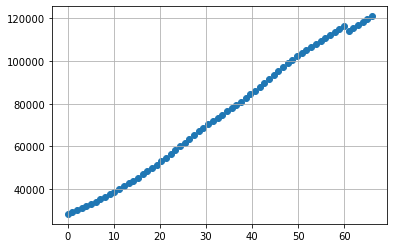

In [11]:
import pandas as pd
data = pd.read_csv("population_data.csv")
Poblacion = np.array(data["Poblacion"])

n = len(Poblacion)
x = np.linspace(0,n,n)
plt.figure
plt.scatter(x,Poblacion)
plt.grid()


In [12]:
#Funcion pob
def Fpob(beta, X, y, s):
    beta = np.reshape(beta, [s,-1])
    pred = X @ beta
    pob = (y-pred).T @ (y-pred)
    return pob [0][0]

# Grados x columna 1
ones = np.ones([n,1])
x1 = np.reshape(x,[n,-1])
x2 = np.reshape(x**2,[n,-1])
x3 = np.reshape(x**3,[n,-1])

# matrices de variables x

MatX1 = np.hstack((ones,x1))
MatX2 = np.hstack((ones,x1,x2))
MatX3 = np.hstack((ones,x1,x2,x3))

# BETA 
beta1 = np.random.rand(2)
beta2 = np.random.rand(3)
beta3 = np.random.rand(4)

y = np.reshape(Poblacion,[n,-1])
y

array([[ 28296],
       [ 29110],
       [ 29980],
       [ 30904],
       [ 31880],
       [ 32906],
       [ 33978],
       [ 35095],
       [ 36253],
       [ 37448],
       [ 38677],
       [ 39939],
       [ 41234],
       [ 42564],
       [ 43931],
       [ 45339],
       [ 46784],
       [ 48264],
       [ 49788],
       [ 51361],
       [ 52988],
       [ 54669],
       [ 56396],
       [ 58156],
       [ 59931],
       [ 61708],
       [ 63486],
       [ 65261],
       [ 67013],
       [ 68715],
       [ 70353],
       [ 71916],
       [ 73416],
       [ 74880],
       [ 76351],
       [ 77859],
       [ 79410],
       [ 80999],
       [ 82635],
       [ 84327],
       [ 86077],
       [ 87890],
       [ 89758],
       [ 91654],
       [ 93542],
       [ 95393],
       [ 97202],
       [ 98969],
       [100679],
       [102317],
       [103874],
       [105340],
       [106724],
       [108056],
       [109382],
       [110732],
       [112117],
       [113530],
       [114968

In [13]:
print("Grado 1:",Fpob(beta1,MatX1,y,2))
print("Grado 2:",Fpob(beta2,MatX2,y,3))
print("Grado 3:",Fpob(beta3,MatX3,y,4))

Grado 1: 421701736094.81116
Grado 2: 415380260716.4266
Grado 3: 320732313303.7801


In [14]:
import scipy.optimize as opt

solp1 = opt.minimize(Fpob,beta1,args=(MatX1,y,2))
solp2 = opt.minimize(Fpob,beta2,args=(MatX2,y,3))
solp3 = opt.minimize(Fpob,beta3,args=(MatX3,y,4))
solp1

      fun: 212137169.5443036
 hess_inv: array([[ 2.12397621e-02, -4.98574303e-04],
       [-4.98574303e-04,  1.68394515e-05]])
      jac: array([ 0., -4.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 164
      nit: 8
     njev: 51
   status: 2
  success: False
        x: array([24138.01667427,  1520.5798618 ])

In [15]:
solp2

      fun: 210941621.44585806
 hess_inv: array([[3.69103247e-07, 2.01676756e-08, 1.00838378e-08],
       [2.01676756e-08, 4.26181812e-09, 2.13090906e-09],
       [1.00838378e-08, 2.13090906e-09, 1.06545492e-09]])
      jac: array([ 0.,  0., -8.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 268
      nit: 11
     njev: 64
   status: 2
  success: False
        x: array([2.44255897e+04, 1.49402817e+03, 4.02299091e-01])

In [16]:
solp3

      fun: 25240442.641314365
 hess_inv: array([[ 1.32449326e-06, -8.83726999e-08,  6.01203804e-08,
        -9.95391883e-10],
       [-8.83726999e-08,  6.26143601e-09, -4.26029198e-09,
         7.05252051e-11],
       [ 6.01203804e-08, -4.26029198e-09,  2.90002165e-09,
        -4.77496651e-11],
       [-9.95391883e-10,  7.05252051e-11, -4.77496651e-11,
         1.25157123e-12]])
      jac: array([  0.,  10.,   8., 724.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 322
      nit: 14
     njev: 62
   status: 2
  success: False
        x: array([ 2.84776903e+04,  7.27892291e+02,  2.96452839e+01, -2.95383990e-01])

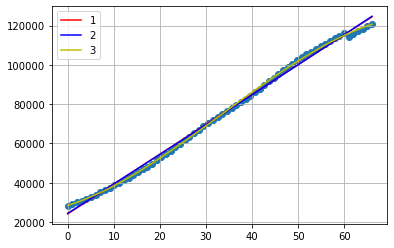

In [17]:
yp1 = solp1.x[0] + solp1.x[1]*x
yp2 = solp2.x[0] + solp2.x[1]*x + solp2.x[2]*x**2
yp3 = solp3.x[0] + solp3.x[1]*x + solp3.x[2]*x**2 + solp3.x[3]*x**3

plt.figure()
plt.scatter(x,Poblacion)
plt.plot(x,yp1,"r", label = "1")
plt.plot(x,yp2,"b", label = "2")
plt.plot(x,yp3,"y", label = "3")
plt.legend()
plt.grid()

### 2. Los nacimientos como variable dependiente $y$. ###

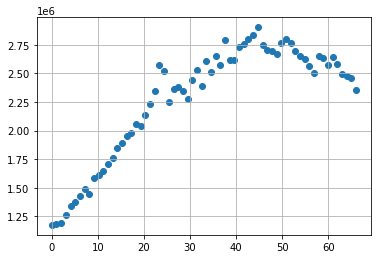

In [22]:
Nacimientos = np.array(data["Nacimientos"])
nm = len(Nacimientos)
x = np.linspace(0,nm,nm)

plt.figure()
plt.scatter(x,Nacimientos)
plt.grid()

In [26]:
#Funcion pob
def Fpob(beta, X, y, s):
    beta = np.reshape(beta, [s,-1])
    pred = X @ beta
    pob = (y-pred).T @ (y-pred)
    return pob [0][0]

# Grados x columna 1
ones = np.ones([nm,1])
nx1 = np.reshape(x,[nm,-1])
nx2 = np.reshape(x**2,[nm,-1])
nx3 = np.reshape(x**3,[nm,-1])

# matrices de variables x

MatnX1 = np.hstack((ones,x1))
MatnX2 = np.hstack((ones,x1,x2))
MatnX3 = np.hstack((ones,x1,x2,x3))

# BETA 
beta1 = np.random.rand(2)
beta2 = np.random.rand(3)
beta3 = np.random.rand(4)

y = np.reshape(Nacimientos,[nm,-1])
y

array([[1174947],
       [1183788],
       [1195209],
       [1261775],
       [1339837],
       [1377917],
       [1427722],
       [1485202],
       [1447578],
       [1589606],
       [1608174],
       [1647006],
       [1705481],
       [1756624],
       [1849408],
       [1888171],
       [1954340],
       [1981363],
       [2058251],
       [2037561],
       [2132630],
       [2231399],
       [2346002],
       [2572287],
       [2522580],
       [2254497],
       [2366305],
       [2379327],
       [2346862],
       [2274267],
       [2446238],
       [2530662],
       [2392849],
       [2609088],
       [2511894],
       [2655671],
       [2577045],
       [2794390],
       [2622031],
       [2620262],
       [2735312],
       [2756447],
       [2797397],
       [2839686],
       [2904389],
       [2750444],
       [2707718],
       [2698425],
       [2668429],
       [2769089],
       [2798339],
       [2767610],
       [2699084],
       [2655894],
       [2625056],
       [25

In [27]:
print("Grado 1:",Fpob(beta1,MatX1,y,2))
print("Grado 2:",Fpob(beta2,MatX2,y,3))
print("Grado 3:",Fpob(beta3,MatX3,y,4))

Grado 1: 358555380747150.6
Grado 2: 358449008884279.2
Grado 3: 348148603475068.44


In [28]:
import scipy.optimize as opt

soln1 = opt.minimize(Fpob,beta1,args=(MatnX1,y,2))
soln2 = opt.minimize(Fpob,beta2,args=(MatnX2,y,3))
soln3 = opt.minimize(Fpob,beta3,args=(MatnX3,y,4))
soln1

      fun: 4737914698036.844
 hess_inv: array([[ 5.58122816e-03, -5.32907052e-14],
       [-5.32907052e-14,  2.27595720e-15]])
      jac: array([      0., -458752.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 216
      nit: 6
     njev: 69
   status: 2
  success: False
        x: array([1562678.50961027,   21647.63574935])

In [29]:
soln2

      fun: 492921063609.9547
 hess_inv: array([[ 1.16315058e-02,  1.05635322e-06, -4.22621899e-06],
       [ 1.05635322e-06,  2.24044394e-10, -8.41947178e-10],
       [-4.22621899e-06, -8.41947178e-10,  3.36705502e-09]])
      jac: array([    0., 16384., 98304.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 250
      nit: 12
     njev: 60
   status: 2
  success: False
        x: array([ 1.02111118e+06,  7.16766703e+04, -7.58085866e+02])

In [30]:
soln3

      fun: 441782936007.17725
 hess_inv: array([[ 1.07258139e-01, -1.20588904e-02,  3.63145547e-04,
        -3.17728408e-06],
       [-1.20588904e-02,  1.87103768e-03, -6.40790744e-05,
         6.01612202e-07],
       [ 3.63145547e-04, -6.40790744e-05,  2.34820768e-06,
        -2.30040819e-08],
       [-3.17728408e-06,  6.01612202e-07, -2.30040819e-08,
         2.32022021e-10]])
      jac: array([0.0000000e+00, 2.8672000e+04, 1.2492800e+06, 7.0946816e+07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 281
      nit: 8
     njev: 54
   status: 2
  success: False
        x: array([ 1.08864495e+06,  5.89133292e+04, -2.71104897e+02, -4.91765770e+00])

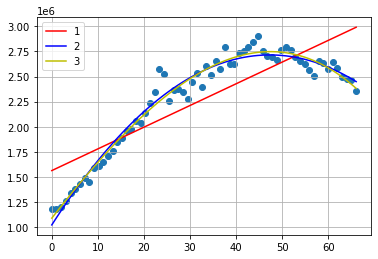

In [32]:
yn1 = soln1.x[0] + soln1.x[1]*x
yn2 = soln2.x[0] + soln2.x[1]*x + soln2.x[2]*x**2
yn3 = soln3.x[0] + soln3.x[1]*x + soln3.x[2]*x**2 + soln3.x[3]*x**3

plt.figure()
plt.scatter(x,Nacimientos)
plt.plot(x,yn1,"r", label = "1")
plt.plot(x,yn2,"b", label = "2")
plt.plot(x,yn3,"y", label = "3")
plt.legend()
plt.grid()